In [52]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from tabulate import tabulate
from sklearn.ensemble import RandomForestClassifier
import datetime as dt
from sklearn.metrics import (explained_variance_score, mean_absolute_error,
                             mean_squared_error, r2_score)
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

font = {'size'   : 14}
matplotlib.rc('font', **font)

In [2]:
cd ../files/

/home/carlywolfbrandt/galvanize/assignments/predicting_churn/files


In [82]:
data = pd.read_csv('churn.csv')
train = pd.read_csv('churn_train.csv')
test = pd.read_csv('churn_test.csv')

In [76]:
print(tabulate(model_data.info(), tablefmt="pipe"))

NameError: name 'model_data' is not defined

In [39]:
data.columns[data.isna().any()].tolist()

['avg_rating_by_driver', 'avg_rating_of_driver', 'phone']

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [83]:
data.loc[:,['avg_rating_by_driver']] = data[['avg_rating_by_driver']].fillna(data[['avg_rating_by_driver']].mean())
data.loc[:,['avg_rating_of_driver']] = data[['avg_rating_of_driver']].fillna(data[['avg_rating_of_driver']].mean())
data.loc[:,['phone']] = data[['phone']].replace(np.nan, 'Other')

train.loc[:,['avg_rating_by_driver']] = train[['avg_rating_by_driver']].fillna(train[['avg_rating_by_driver']].mean())
train.loc[:,['avg_rating_of_driver']] = train[['avg_rating_of_driver']].fillna(train[['avg_rating_of_driver']].mean())
train.loc[:,['phone']] = train[['phone']].replace(np.nan, 'Other')

test.loc[:,['avg_rating_by_driver']] = train[['avg_rating_by_driver']].fillna(test[['avg_rating_by_driver']].mean())
test.loc[:,['avg_rating_of_driver']] = train[['avg_rating_of_driver']].fillna(train[['avg_rating_of_driver']].mean())
test.loc[:,['phone']] = data[['phone']].replace(np.nan, 'Other')

In [ ]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Sort values by correlation
s = corr_matrix.unstack()
so = s.sort_values(kind="quicksort")

#plot correlation matriz
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap='YlGnBu', linewidths=.5, fmt='.2f')
plt.show()

In [75]:
print(tabulate(data.head(), tablefmt="pipe", headers = 'keys'))

|    |   avg_dist |   avg_rating_by_driver |   avg_rating_of_driver |   avg_surge | last_trip_date      | signup_date         |   surge_pct |   trips_in_first_30_days | luxury_car_user   |   weekday_pct |   city_King's Landing |   city_Winterfell |   phone_Android |   phone_iPhone |   days_since_last_ride | churn   |   days_since_customer |
|---:|-----------:|-----------------------:|-----------------------:|------------:|:--------------------|:--------------------|------------:|-------------------------:|:------------------|--------------:|----------------------:|------------------:|----------------:|---------------:|-----------------------:|:--------|----------------------:|
|  0 |       3.67 |                    5   |                    4.7 |        1.1  | 2014-06-17 00:00:00 | 2014-01-25 00:00:00 |        15.4 |                        4 | True              |          46.2 |                     1 |                 0 |               0 |              1 |                     14 | False

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [44]:
data['phone'].value_counts()

iPhone     34582
Android    15022
Other        396
Name: phone, dtype: int64

In [5]:
data.columns[data.isna().any()].tolist()

[]

In [5]:
data['last_trip_date'] = data['last_trip_date'].astype('datetime64[ns]')
data['signup_date'] = data['signup_date'].astype('datetime64[ns]')

train['last_trip_date'] = train['last_trip_date'].astype('datetime64[ns]')
data['signup_date'] = data['signup_date'].astype('datetime64[ns]')

data['last_trip_date'] = data['last_trip_date'].astype('datetime64[ns]')
data['signup_date'] = data['signup_date'].astype('datetime64[ns]')

In [47]:
data.dtypes

avg_dist                         float64
avg_rating_by_driver             float64
avg_rating_of_driver             float64
avg_surge                        float64
city                              object
last_trip_date            datetime64[ns]
phone                             object
signup_date               datetime64[ns]
surge_pct                        float64
trips_in_first_30_days             int64
luxury_car_user                     bool
weekday_pct                      float64
dtype: object

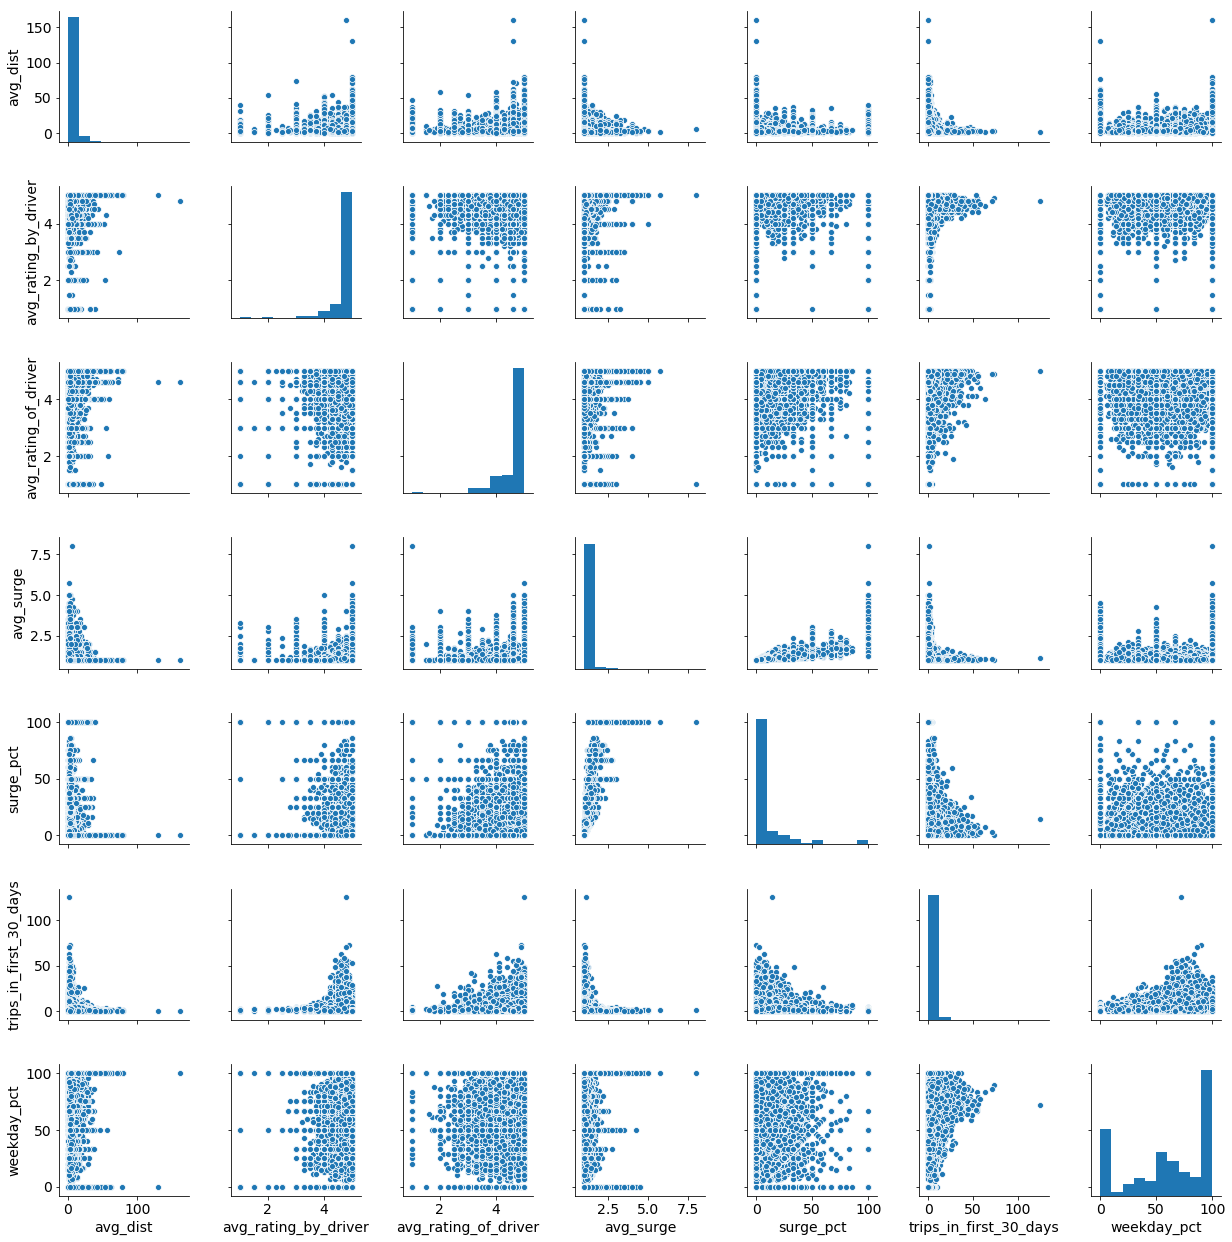

In [48]:
sns.pairplot(data[['avg_dist','avg_rating_by_driver','avg_rating_of_driver','avg_surge','city','surge_pct','trips_in_first_30_days','weekday_pct']])

In [32]:
mask = data[['avg_dist','avg_rating_by_driver','avg_rating_of_driver','avg_surge','surge_pct','trips_in_first_30_days','weekday_pct']]
outlier_mask = (np.abs(stats.zscore(mask.select_dtypes(include=np.number))) < 3).all(axis=1)

In [33]:
data = data[outlier_mask]

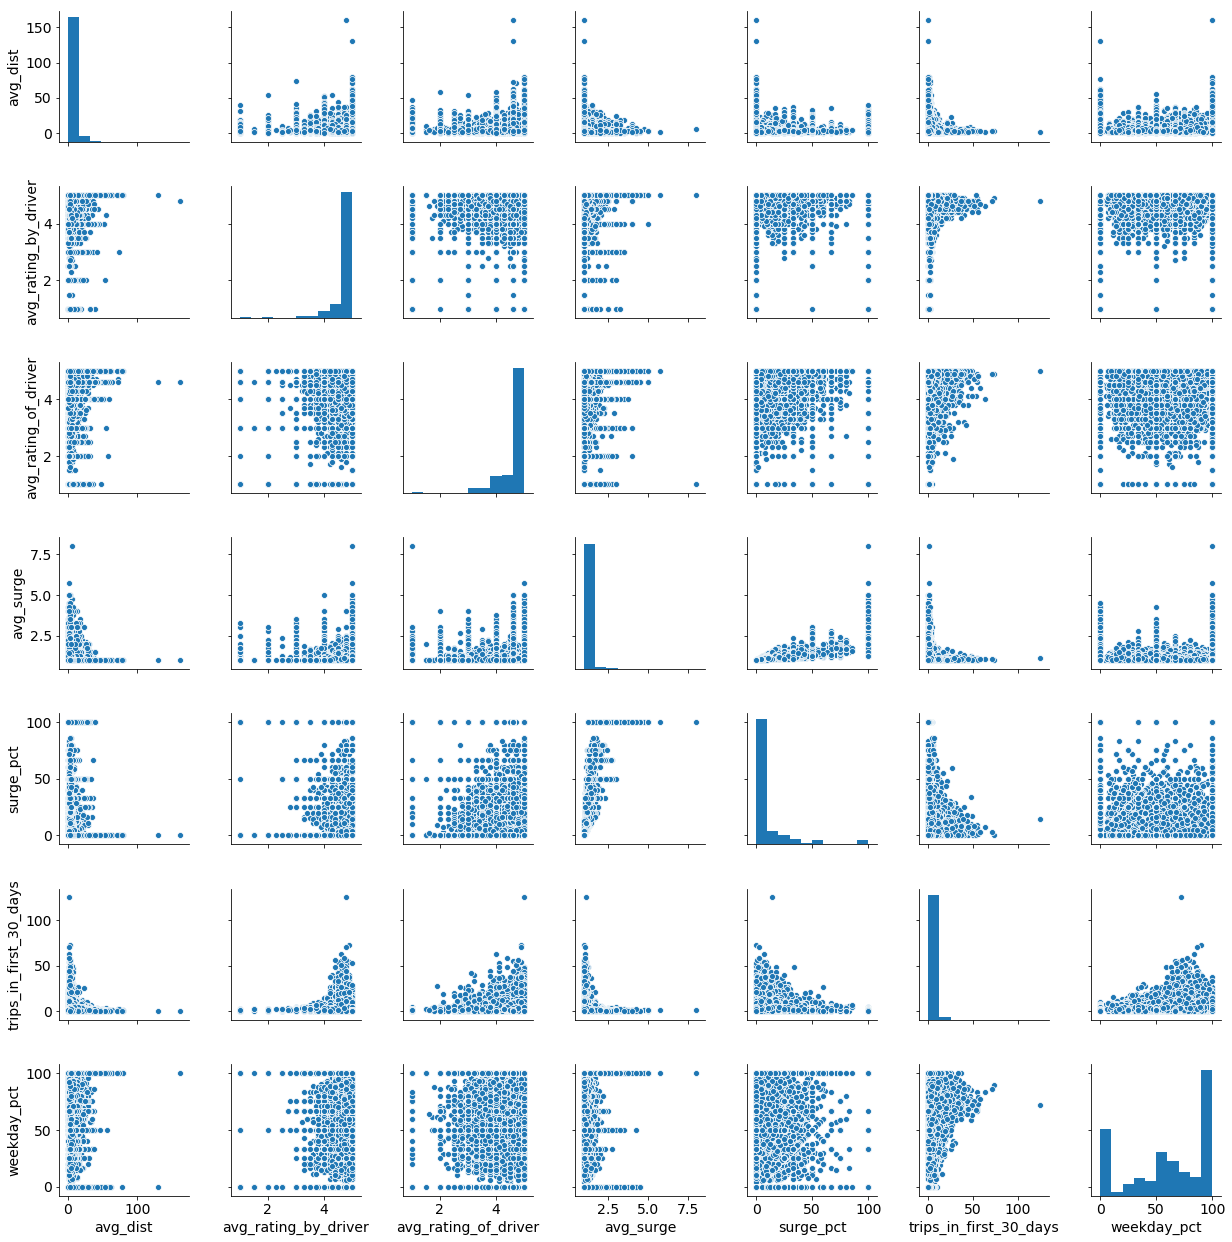

In [49]:
sns.pairplot(data[['avg_dist','avg_rating_by_driver','avg_rating_of_driver','avg_surge','city','surge_pct','trips_in_first_30_days','weekday_pct']])

In [6]:
data = pd.get_dummies(data, columns=["city"])
data = pd.get_dummies(data, columns=["phone"])

In [9]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Other,phone_iPhone
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,True,46.2,0,1,0,0,0,1
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,False,50.0,1,0,0,1,0,0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,False,100.0,1,0,0,0,0,1
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,True,80.0,0,1,0,0,0,1
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,False,82.4,0,0,1,1,0,0


In [7]:
data = data.drop(columns=['city_Astapor'])

In [8]:
data = data.drop(columns=['phone_Other'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
city_King's Landing       50000 non-null uint8
city_Winterfell           50000 non-null uint8
phone_Android             50000 non-null uint8
phone_iPhone              50000 non-null uint8
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), uint8(4)
memory usage: 3.7 MB


In [9]:
def calc_diff(date, dc):
    return (dc-date).days

col = 'last_trip_date'

data[col]= pd.to_datetime(data[col])
dc = pd.Timestamp("2014-07-01")

data['days_since_last_ride'] = data.apply(lambda row: calc_diff(row['last_trip_date'], dc),axis=1)
data['churn'] = data['days_since_last_ride']>30

data['signup_date'] = pd.to_datetime(data['signup_date'])
data['days_since_customer'] = data.apply(lambda row: calc_diff(row['signup_date'], dc),axis=1)

In [10]:
data.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'last_trip_date', 'signup_date', 'surge_pct', 'trips_in_first_30_days',
       'luxury_car_user', 'weekday_pct', 'city_King's Landing',
       'city_Winterfell', 'phone_Android', 'phone_iPhone',
       'days_since_last_ride', 'churn'],
      dtype='object')

In [10]:
data_model = data[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge'
                   , 'surge_pct', 'trips_in_first_30_days',
       'luxury_car_user', 'weekday_pct', "city_King's Landing",
       'city_Winterfell', 'phone_Android', 'phone_iPhone','churn','days_since_customer']]

X = data_model.copy()
y = X.pop('churn')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 101)

In [54]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, n_jobs=-2)
clf = rf         
model = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('clf', clf)
    ])
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
model.score(X_test,y_test)

/home/carlywolfbrandt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/carlywolfbrandt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/carlywolfbrandt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/carlywolfbrandt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform

0.77896

In [67]:
feat = pd.DataFrame(rf.feature_importances_)
feat.index = X_train.columns
feat.rename({0:'feature_importance'}, axis = 1, inplace = True)
feat = feat.sort_values(by = 'feature_importance', ascending = False)
feat

,feature_importance
avg_rating_by_driver,0.178613
city_King's Landing,0.138290
surge_pct,0.134196
weekday_pct,0.117909
avg_surge,0.092685
trips_in_first_30_days,0.063549
luxury_car_user,0.057992
avg_dist,0.051416
phone_Android,0.047054
phone_iPhone,0.043760


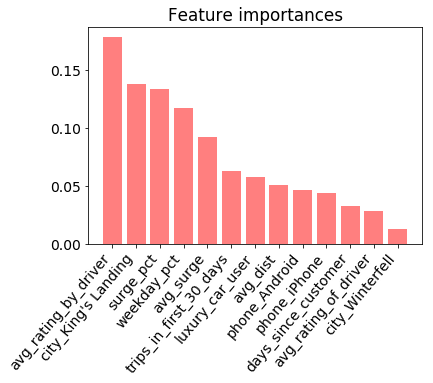

In [78]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices],
       color="r", align="center", alpha =.5)
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation = 50, ha = 'right')
#plt.xlim([-1, X.shape[1]])
plt.show()

In [80]:
logit = LogisticRegression(solver='lbfgs', multi_class='multinomial')
model = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('clf', logit)
    ])
scaler = model.named_steps['scaler']
classifier = model.named_steps['clf']
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
model.score(X_test,y_test)

TypeError: __init__() got an unexpected keyword argument 'normalize'

In [70]:
coeffs = pd.DataFrame(logit.coef_)
coeffs.columns = X_train.columns
coeffs = coeffs.T
coeffs.rename({0:'value'}, axis = 1, inplace = True)
coeffs = coeffs.sort_values(by = ['value'], ascending = False)

,value
phone_Android,0.106989
avg_dist,0.099525
avg_rating_by_driver,0.037905
avg_rating_of_driver,0.014436
avg_surge,0.014364
weekday_pct,0.011338
days_since_customer,-0.029239
surge_pct,-0.033084
city_Winterfell,-0.127842
phone_iPhone,-0.145512


In [98]:
churners = data_model.groupby(["churn"]).sum()
churners

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,days_since_customer
churn,,,,,,,,,,,,,
False,96178.48,89559.713695,86379.544763,20191.91,172109.2,62172,9497.0,1154359.4,6363.0,8213.0,3146.0,15525.0,3115507
True,193662.85,149348.196102,143698.419800,33546.28,270367.6,51738,9357.0,1891944.8,3767.0,15123.0,11876.0,19057.0,5157259
